<a href="https://colab.research.google.com/github/madhumitafilos/Collab/blob/main/Madhumita_DecisionTree_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Decision Tree**

**Import Required libraries**

In [28]:
# numerical library:
import numpy as np

# data manipulation library:
import pandas as pd

# to split data to training and validation dataset
from sklearn.model_selection import train_test_split

#Decision Tree
from sklearn.tree import DecisionTreeRegressor

#To visualise Decision Regressor tree
from sklearn import tree
from matplotlib import pyplot as plt

#Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


**Read/Extract data**

In [3]:
wind_DS = pd.read_csv('/content/drive/MyDrive/training_data.csv')
wind_DS.head()

,active_power,timestamp,pitch_angle,reactive_power,nacelle_angle,nacelle_temp,wind_speed1,wind_speed2,wind_speed_avg,wind_angle,...,outdoor_temp,rotor_angular_velocity,rotor_bearing_temp,weather_temp,pressure,humidity,weather_wind_speed,weather_wind_angle,rain_1h,snow_1h
0,801.22998,2013-01-01 00:00:00,-1.0,67.559998,286.00000,20.129999,7.52,7.76,7.64,286.19000,...,5.44,16.950001,26.049999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
1,943.16998,2013-01-01 00:10:00,-1.0,70.260002,286.00000,21.420000,8.18,8.45,8.31,288.32999,...,5.74,17.139999,26.100000,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
2,998.48999,2013-01-01 00:20:00,-1.0,75.330002,286.00000,22.049999,8.29,8.66,8.47,293.04001,...,6.09,17.150000,26.219999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
3,837.96002,2013-01-01 00:30:00,-1.0,82.739998,286.00000,22.299999,7.89,8.24,8.06,294.01999,...,6.35,16.910000,26.309999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0
4,871.57001,2013-01-01 00:40:00,-1.0,82.349998,294.17999,22.600000,7.86,8.20,8.03,299.22000,...,6.51,16.920000,26.389999,5.39,1011.0,75.0,5.66,180.0,0.0,0.0


Defining features X and y

In [6]:
X = wind_DS[['pitch_angle','reactive_power','nacelle_angle','nacelle_temp','wind_speed1','wind_speed2','wind_speed_avg','wind_angle','vane_angle','outdoor_temp','rotor_angular_velocity','rotor_bearing_temp','weather_temp','pressure','humidity','weather_wind_speed','weather_wind_angle','rain_1h','snow_1h']]
#X = wind_DS[['pitch_angle','reactive_power','nacelle_temp','wind_speed_avg','rotor_angular_velocity']]
y = wind_DS['active_power']

**Dividing data into training and vaidation data set**

In [8]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

Building Decision Tree Classifier using Gini Criteria

In [18]:
wind_regression_tree = DecisionTreeRegressor(criterion= 'squared_error', max_depth= 3)
wind_regression_tree.fit(train_X, train_y)


DecisionTreeRegressor(max_depth=3)

Measuring the test accuracy of the Decision tree

In [25]:
wind_regression_tree_predict = wind_regression_tree.predict(test_X)
wind_regression_tree.score(test_X, test_y)

0.9764923859071523

Visualise Decision Regressor tree

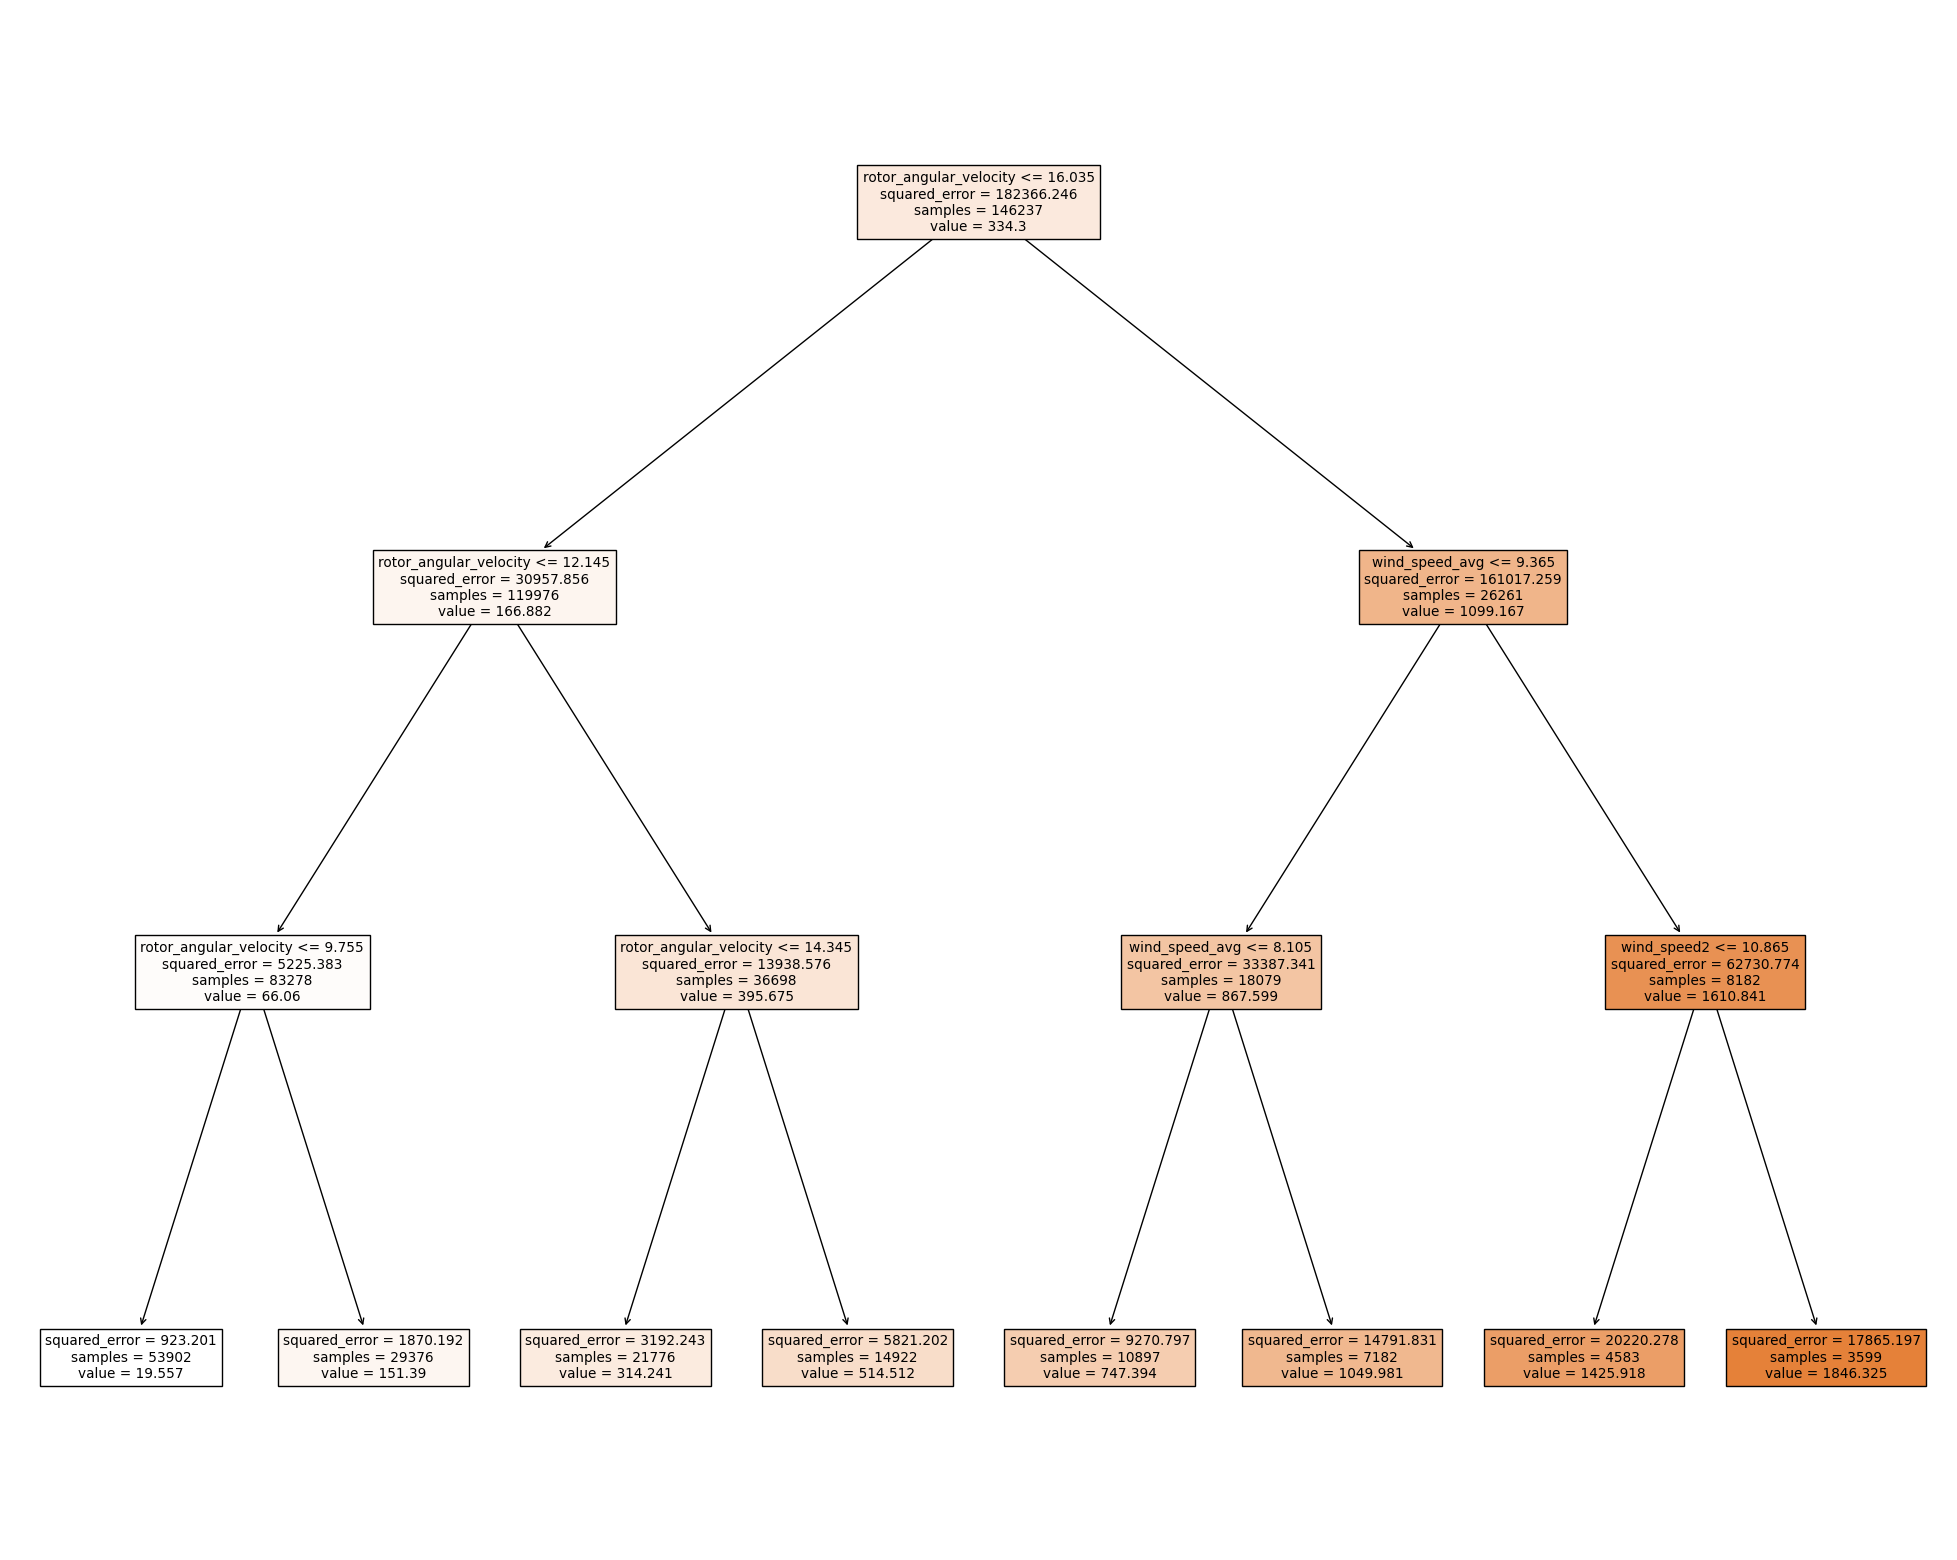

In [32]:
wind_regression_tree_fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(wind_regression_tree, feature_names=train_X.columns, filled=True)